Building prefix dict from C:\Users\K410\文字雲\dict.txt.big.txt ...
Loading model from cache C:\Users\K410\AppData\Local\Temp\jieba.u61e387ff8014b1a654f7d9020e6ad87b.cache


哥布林- 维基百科，自由的百科全书https://zh.wikipedia.org › zh-tw › 哥布林哥布林殺手- 维基百科，自由的百科全书https://zh.wikipedia.org › zh-tw › 哥布林殺手哥布林殺手[1] - 巴哈姆特動畫瘋https://ani.gamer.com.tw › animeVideo哥布林殺手漫畫_黑瀨浩介×蝸牛くも- 看漫畫繁體版 - 在線看漫畫https://tw.manhuagui.com › comic哥布林殺手| 楓林網8maple.ru › ...【馬姿】冷血的哥布林殺手竟然有身材超棒的青梅竹馬？！還天天共度 ...https://www.youtube.com › watch哥布林 - YouTubehttps://www.youtube.com › watch哥布林殺手第1集-動漫-高清正版影音線上看-愛奇藝台灣站tw.iqiyi.com › 動漫 › 哥布林殺手博客來-GOBLIN SLAYER! 哥布林殺手(08)https://www.books.com.tw › products哥布林殺手- Komica wikihttps://wiki.komica.org › 哥布林殺手


Loading model cost 1.219 seconds.
Prefix dict has been built succesfully.


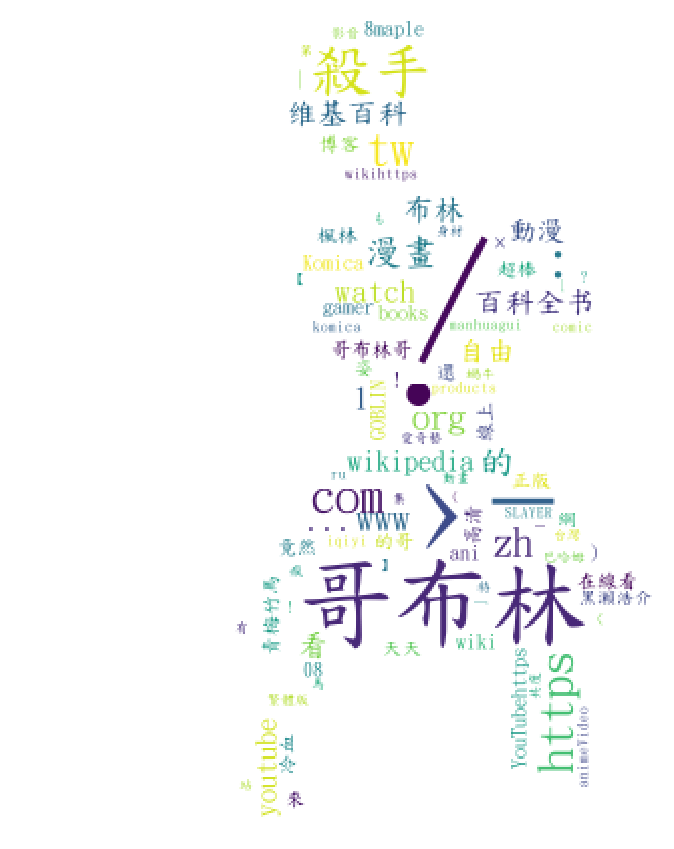

In [4]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba
import numpy as np
from collections import Counter
#text = open('文字雲/星爆.txt', "r",encoding="utf-8").read()

import requests
from bs4 import BeautifulSoup
google_url = 'https://www.google.com.tw/search'
my_params = {'q': '哥布林'}
r = requests.get(google_url, params = my_params)

if r.status_code == requests.codes.ok:
    soup = BeautifulSoup(r.text, 'html.parser')
items = soup.select('div.kCrYT > a[href^="/url"]')


text = ''
for i in items:
    text = text + i.text
print( text)


jieba.set_dictionary('文字雲/dict.txt.big.txt')
with open('文字雲/stopword_cloud.txt', 'r', encoding='utf-8-sig')as f:
    stops = f.read().split('\n')
terms = []
for t in jieba.cut(text, cut_all=False):
    if t not in stops:
        terms.append(t)
diction = Counter(terms)

font = "C:\\Windows\\Fonts\\kaiu.ttf"

mask = np.array(Image.open("文字雲/star burst stream.png"))
wordcloud = WordCloud(background_color="white",mask=mask, font_path=font)
wordcloud.generate_from_frequencies(diction)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

wordcloud.to_file("news_Wordcloud.png")
